<a href="https://colab.research.google.com/github/shyamal00/python-AI-projects/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Classification

## Clone the Github Repo to access the Dataset

In [ ]:
!git clone https://github.com/Ashish-Arya-CS/Coursera-Content.git

## Import necessary Libraries 

In [ ]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    


## Creating Directories to store Cropped Images

In [ ]:
# Create Directory for Training Data
os.mkdir("/content/Crop-Brian-MRI")
os.mkdir("/content/Crop-Brian-MRI/glioma_tumor")
os.mkdir("/content/Crop-Brian-MRI/meningioma_tumor")
os.mkdir("/content/Crop-Brian-MRI/no_tumor")
os.mkdir("/content/Crop-Brian-MRI/pitutary_tumor")


In [ ]:
# Create Directory for Testing Data
os.mkdir("/content/Test-data")
os.mkdir("/content/Test-data/glioma_tumor")
os.mkdir("/content/Test-data/meningioma_tumor")
os.mkdir("/content/Test-data/no_tumor")
os.mkdir("/content/Test-data/pitutary_tumor")

## Data Visualization

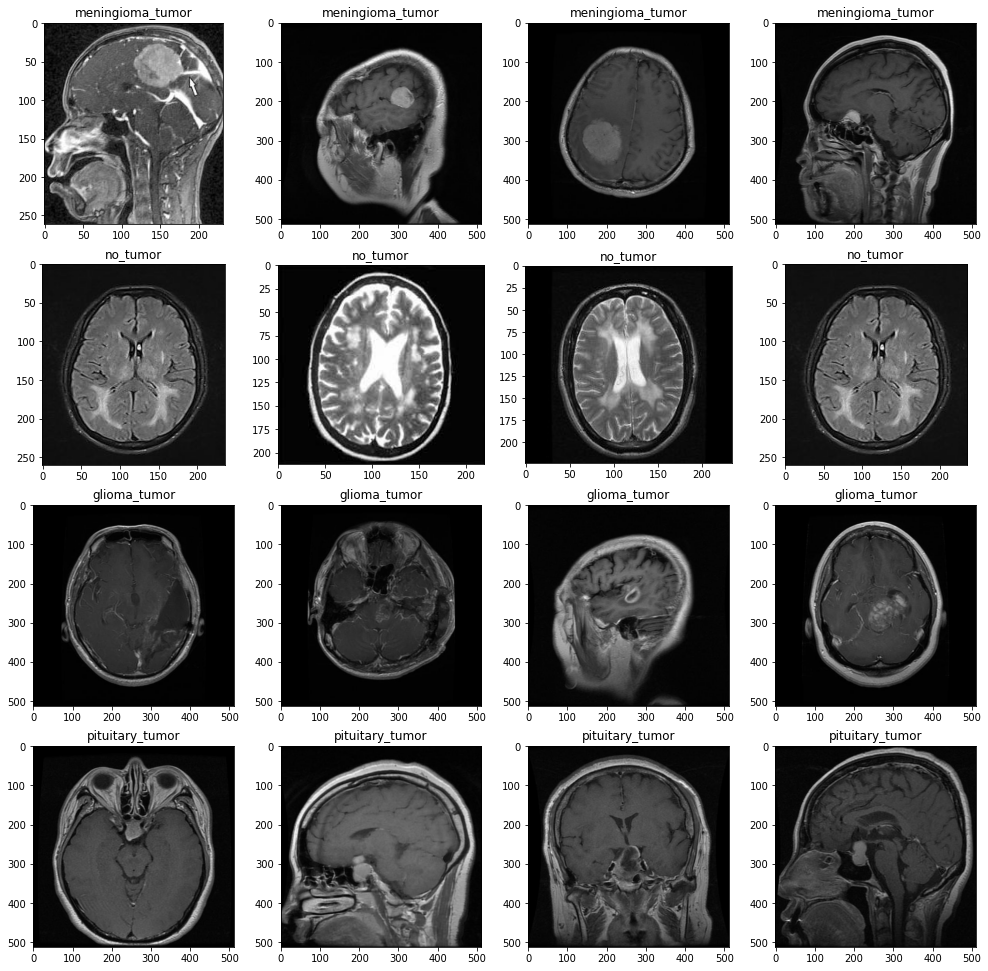

In [ ]:
train_dir = "/content/Coursera-Content/Brain-MRI/Training/"
test_dir = "/content/Coursera-Content/Brain-MRI/Testing/"

classes = os.listdir("/content/Coursera-Content/Brain-MRI/Training")
files_path_dict ={}

for c in classes:
  files_path_dict[c] = list(map(lambda x:train_dir+c+'/'+x,os.listdir(train_dir+c)))

plt.figure(figsize=(17,17))
index = 0
for c in classes:
  random.shuffle(files_path_dict[c]) 
  path_list = files_path_dict[c][:5]
  for i in range(1,5):
    index +=1
    plt.subplot(4,4,index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)



## Create a Function to Crop Images

In [ ]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #bgr to gray
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0) #blur image
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1] #pixel value 
    img_thresh = cv2.erode(img_thresh, None, iterations=2) #
    img_thresh = cv2.dilate(img_thresh, None, iterations=2) #

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #EXPERNAL BOUNDARIES
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea) #BIGGEST CONTOURS

    extLeft = tuple(c[c[:, :, 0].argmin()][0]) #
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image


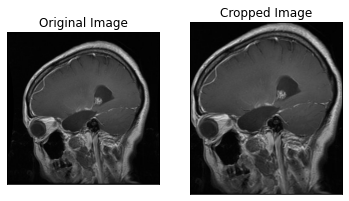

In [ ]:
example_img = cv2.imread("/content/Coursera-Content/Brain-MRI/Training/glioma_tumor/gg (101).jpg")
cropped_img = crop_image(example_img,plot=True)

## Saving The Cropped Images 

In [ ]:
# Crop the Training Images and Save it to the Directory we previously cretaed
glioma = train_dir + "glioma_tumor"
meningioma = train_dir +"meningioma_tumor"
no_tumor = train_dir + "no_tumor"
pituitary = train_dir +"pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "/content/Crop-Brian-MRI/glioma_tumor/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j+1
j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "/content/Crop-Brian-MRI/meningioma_tumor/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j+1
j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "/content/Crop-Brian-MRI/no_tumor/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j+1    
j = 0   
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "/content/Crop-Brian-MRI/pituitary_tumor/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j+1 

100%|██████████| 901/901 [00:05<00:00, 157.87it/s]


In [ ]:
# Crop the testing Images and Save it to the Directory we previously cretaed
glioma = test_dir + "glioma_tumor"
meningioma = test_dir +"meningioma_tumor"
no_tumor = test_dir + "no_tumor"
pituitary = test_dir +"pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "/content/Test-data/glioma_tumor/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j+1
j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "/content/Test-data/meningioma_tumor/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j+1
j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "/content/Test-data/no_tumor/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j+1    
j = 0   
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary,i)
  img = cv2.imread(path)
  img = crop_image(img, plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "/content/Test-data/pituitary_tumor/" + str(j) + ".jpeg"
    cv2.imwrite(save_path,img)
    j = j+1 

100%|██████████| 5/5 [00:00<00:00, 95.91it/s]


## Perform Data Augmentation and Prepare the Train, Validation and Test Dataset

In [ ]:
# Use Image Data Generator to perform this task.
datagen = ImageDataGenerator(rotation_range=10,height_shift_range=0.2,horizontal_flip=True,validation_split=0.2)
train_data = datagen.flow_from_directory('/content/Crop-Brian-MRI/',target_size = (224,224),batch_size = 32,class_mode='categorical',subset='training')

valid_data = datagen.flow_from_directory('/content/Crop-Brian-MRI/',target_size = (224,224),batch_size = 32,class_mode='categorical',subset='validation')
test_datagen = ImageDataGenerator()
test_data = datagen.flow_from_directory('/content/Test-data/',target_size = (224,224),class_mode='categorical')

Found 1892 images belonging to 4 classes.
Found 472 images belonging to 4 classes.
Found 15 images belonging to 4 classes.


In [ ]:
# View the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pitutary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pitutary_tumor': 3}


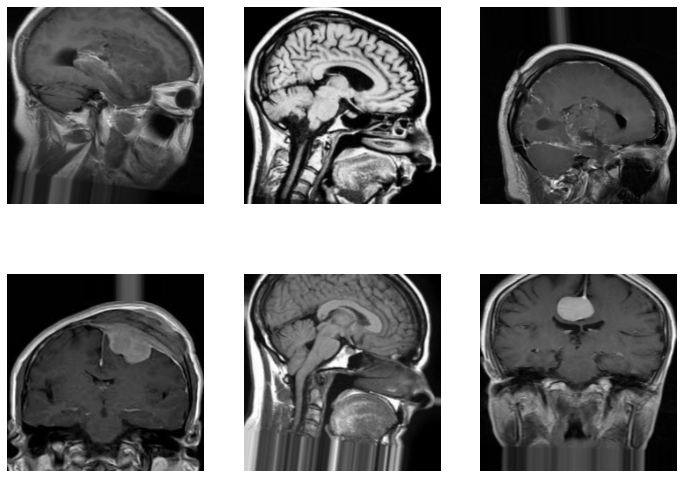

In [ ]:
# View the augmented data.
sample_x,sample_y = next(train_data)
plt.figure(figsize=(12,9))
for i in range(6):
  plt.subplot(2,3,i+1)
  sample = array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)
plt.show()  
print(train_data)

## Build and Compile the Model 

In [ ]:
# Build the Model
effnet = EfficientNetB1(weights="imagenet",include_top=False,input_shape=(224,224,3))
model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4,activation="softmax")(model)
model = Model(inputs = effnet.input,outputs=model)
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
normalization_3 (Normalization) (None, 224, 224, 3)  7           rescaling_3[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_3[0][0]            
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint = ModelCheckpoint("model.h5", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5, mode="auto" ,verbose=1)

In [ ]:
%cp -av /content content_COPY

## Model Training and Model Evaluation

In [ ]:
# Train the model
history = model.fit(train_data, epochs=12, validation_data=valid_data ,verbose=1,callbacks=[checkpoint, earlystop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  # This is added back by InteractiveShellApp.init_pa

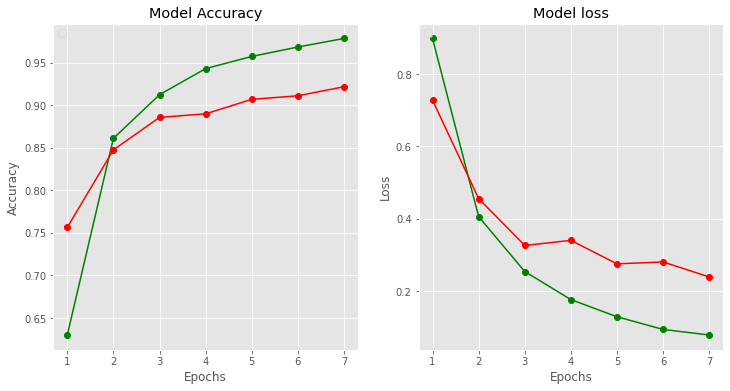

In [97]:
# Plot the training curves
plt.style.use("ggplot")
plt.figure(figsize=(12,6))
epochs = range(1,8)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend("Train","Val",loc="upper left")


plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend("Train","Val",loc="upper left")
plt.show()

In [98]:
# Evaluate the model on Test Set
model.evaluate(test_data)

1/1 [==============================] - 2s 2s/step - loss: 0.1917 - accuracy: 0.9333


[0.1917155385017395, 0.9333333373069763]

## Obtaining Predictions on Test Images

meningioma_tumor


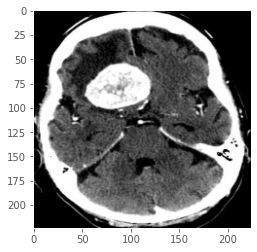

In [ ]:
# Obtain Predictions on Test Images
class_dict = {0: "glioma_tumor", 1:"meningioma_tumor",2:"no_tumor",3: "pituitary_tumor" }
test_img1 = cv2.imread("/content/Test-data/meningioma_tumor/0.jpeg")
plt.imshow(test_img1)
plt.grid(False)
test_img1 = np.expand_dims(test_img1, axis=0)
pred = model.predict(test_img1)
pred = np.argmax(pred)
pred_class = class_dict[pred]
print(pred_class)